# Assignment 1 — Histogram, Entropy, and Mutual Information  
## Ben-Gurion University — Introduction to Digital Image Processing  

**Lecturer:** Prof. Tammy Riklin-Raviv  
**Tutor:** Alon Fainshtein  
**Contact:** [alonfi@post.bgu.ac.il](mailto:alonfi@post.bgu.ac.il)  

This assignment is divided into **two parts**:

1. **Practice Section** — Hands-on experimentation with the concepts learned in class, including histograms, entropy, and mutual information.  
2. **Submission Task** — A challenge in which you must apply the techniques learned to solve a problem.

You will need to submit only the **`functions.py`** file.

---

_For any questions or clarifications, please use the designated assignment forum._


## Mount Google Drive  

To work with Google Colab, you first need to mount your Google Drive.  
Run the following code cell to connect your drive to the notebook:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Next, open the **Files** tab on the left (folder icon) in Google Colab and navigate to:  

`drive → MyDrive → [your working directory]`  

Right-click on the folder and select **Copy path**.  

Paste this path into the designated place in the next code cell.  
This will make all file paths **relative** to your working directory — this is important for both **testing** and **grading**.  


In [2]:
import os

dir_path = "" # Paste dir path here
os.chdir(dir_path)


Let's see if you’ve done this correctly, run the next code cell.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread("great_job.jpg")

# Display the image
plt.imshow(img)
plt.axis('off') # Turn off axis numbers and ticks
plt.show()

Next, in your working directory, you will find a file named **`functions.py`**.  
This file contains several functions that you will need to complete during the assignment and submit for grading.  

To open the file, double-click it in the navigation menu (the same one you used to copy the path earlier).  

Your first task is to complete the `return_names_IDs()` function.  
Once you have implemented it, run the next code cell.

_Don't forget to save the file each time you make a change._

In [ ]:
from functions import return_names_IDs

name1,id1,name2,id2 = return_names_IDs()
print(f"Name1: {name1}, ID1: {id1}, Name2: {name2}, ID2: {id2}")

Name1: None, ID1: None, Name2: None, ID2: None


## Part 1: Histogram

### Part A: Read an Image in Grayscale  

The first step in any *Introduction to Digital Image Processing* course is, of course, to read and display an image.  
In this part, you will work with a **grayscale** image (we will handle color images later in the course).  

In Python, there are many libraries for image processing.  
For this assignment, we will focus on **OpenCV** and **NumPy** for data handling and **Matplotlib** for displaying images and plots.  




Use `cv2.imread` function to read the file **`great_job.jpg`** in grayscale mode and display it using Matplotlib.

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale mode
# cv2.IMREAD_GRAYSCALE ensures we load a single channel (0–255) image
img_gray = cv2.imread('great_job.jpg', cv2.IMREAD_GRAYSCALE)

# Check that the image was loaded
if img_gray is None:
    raise FileNotFoundError("The file 'great_job.jpg' was not found in the working directory.")

# Display the grayscale image using Matplotlib
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()


### Part B: Build Your Own Histogram Function  

A **histogram** in image processing is a graphical representation of the distribution of pixel intensities in an image.  
For a grayscale image, it shows how many pixels have each possible intensity value (0–255 for 8-bit images).  

Histograms are useful for:
- Understanding the **contrast** and **brightness** of an image
- Identifying whether an image is **underexposed** (values bunched at the dark end) or **overexposed** (values bunched at the bright end)
- Preparing for operations such as **histogram equalization**

In this part, you will implement your own histogram calculation function, `manual_histogram()`, **without using built-in histogram functions** like `cv2.calcHist()` or `numpy.histogram()`.  
Your function should:
1. Take a grayscale image as input.
2. Count how many pixels have each intensity value (0–255).
3. Return a NumPy array of length 256 containing these counts.

The next code cell compares your `manual_histogram()` function with the built-in `numpy.histogram()` on the `img_gray` image.  

If your implementation is correct, the two histogram plots should be **identical**.  



In [5]:
def manual_histogram(img):
    """
    Compute the histogram of a grayscale image manually.

    Parameters:
        img (np.ndarray): Grayscale image with pixel values in [0, 255].

    Returns:
        hist (np.ndarray): 1D array of length 256 where hist[i] is
                           the number of pixels with intensity i.
    """
    # Initialize histogram array with zeros
    hist = np.zeros(256, dtype=int)

    # Flatten the image for easy iteration
    flat_img = img.flatten()

    # Count pixel intensities
    for pixel in flat_img:
        hist[pixel] += 1

    return hist

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute histograms
hist_manual = manual_histogram(img_gray)

# Using NumPy's built-in histogram (for comparison)
hist_numpy, _ = np.histogram(img_gray, bins=256, range=(0, 256))

# --- Plot ---
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

# Manual histogram
axs[0].bar(range(256), hist_manual, color='blue')
axs[0].set_title("Manual Histogram")
axs[0].set_xlabel("Pixel Intensity")
axs[0].set_ylabel("Count")

# NumPy histogram
axs[1].bar(range(256), hist_numpy, color='blue')
axs[1].set_title("NumPy Histogram")
axs[1].set_xlabel("Pixel Intensity")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


### Part C: Analyzing Histograms  

In this section, you will explore several aspects of image histograms and how they relate to image appearance.  

Run the next code cell to display the histograms of the following images:
- **Uniform gray image**
- **Checkerboard image**
- **Random noise image**
- **Natural image**

Observe how the shape of each histogram reflects the distribution of pixel intensities in the corresponding image.


In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import data

# Load the images
gray_img = cv2.imread("gray_image.png", cv2.IMREAD_GRAYSCALE)
checkerboard_img = data.checkerboard().astype(np.uint8)
noise_img = cv2.imread("noise_image.png", cv2.IMREAD_GRAYSCALE)
natural_img = cv2.imread("natural.png", cv2.IMREAD_GRAYSCALE)

# Put images and titles in lists
images = [gray_img, checkerboard_img, noise_img, natural_img]
titles = ["Uniform Gray", "Checkerboard", "Random Noise", "Natural Image"]

# Plot each image with its histogram
fig, axes = plt.subplots(len(images), 2, figsize=(10, 8))
for i, (img, title) in enumerate(zip(images, titles)):
    # Show image
    axes[i, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axes[i, 0].set_title(title)
    axes[i, 0].axis('off')

    # Compute histogram using student's function
    hist_manual = manual_histogram(img)

    # Show histogram
    axes[i, 1].bar(range(256), hist_manual)
    axes[i, 1].set_title(f"{title} - Manual Histogram")
    axes[i, 1].set_xlabel("Pixel Intensity")
    axes[i, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()



### Part D: Effects of Permutation, Brightness, and Contrast on Histograms  

In this part, you will apply three transformations to a natural image:  
1. **Permutation** — shuffle the positions of all pixels.  
2. **Brightness adjustment** — shift all pixel intensities up or down.  
3. **Contrast adjustment** — scale pixel intensities around their mean.  

You will then compare the resulting histograms to see how each operation affects the distribution of pixel values.  

Before running the code, try to predict how each transformation will change the histogram.  

Experiment with different values for brightness and contrast to confirm your predictions.


#### 1. Permutation  

The `block_permutation()` function in `functions.py` receives a grayscale image and returns a new image with blocks of the images with the **same pixel values but in a shuffled (permuted) order**.  

The next code cell will use your function to display:  
- The original image and its histogram  
- The permuted image and its histogram  


In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from functions import block_permutation
# Apply permutation
rng = np.random.default_rng(5)
permuted_img = block_permutation(natural_img, rng =rng ,n_blocks=4)

# Prepare figure
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Original image
axes[0, 0].imshow(natural_img, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Permuted image
axes[0, 1].imshow(permuted_img, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title("Permuted Image")
axes[0, 1].axis('off')

# Histogram for original
hist_orig = manual_histogram(natural_img)
axes[1, 0].bar(range(256), hist_orig)
axes[1, 0].set_title("Original Histogram")
axes[1, 0].set_xlabel("Pixel Intensity")
axes[1, 0].set_ylabel("Count")

# Histogram for permuted
hist_perm = manual_histogram(permuted_img)
axes[1, 1].bar(range(256), hist_perm)
axes[1, 1].set_title("Permuted Histogram")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()



#### 2. Brightness  

Complete the `adjust_brightness()` function so that it receives a grayscale image and returns a new image with the **brightness adjusted by adding a constant value** to every pixel.  

Use positive values to make the image brighter and negative values to make it darker.  
Remember to **clip** the pixel values so they stay in the valid range \([0, 255]\).  

The next code cell will use your function to display:  
- The original image and its histogram  
- The brightness-adjusted image and its histogram  

**Note:**  
Shifting brightness changes the histogram by moving it left (darker) or right (brighter).  
If clipping occurs, you may see spikes at the ends of the histogram.

Experiment with the brightness levels.

In [ ]:
def adjust_brightness(img, beta=0):
    """
    Brightness/contrast adjustment.
    new = clip(img + beta, 0, 255)
    beta shifts brightness: positive -> brighter, negative -> darker.
    """
    out = img.astype(np.float32) + beta
    return np.clip(out, 0, 255).astype(np.uint8)

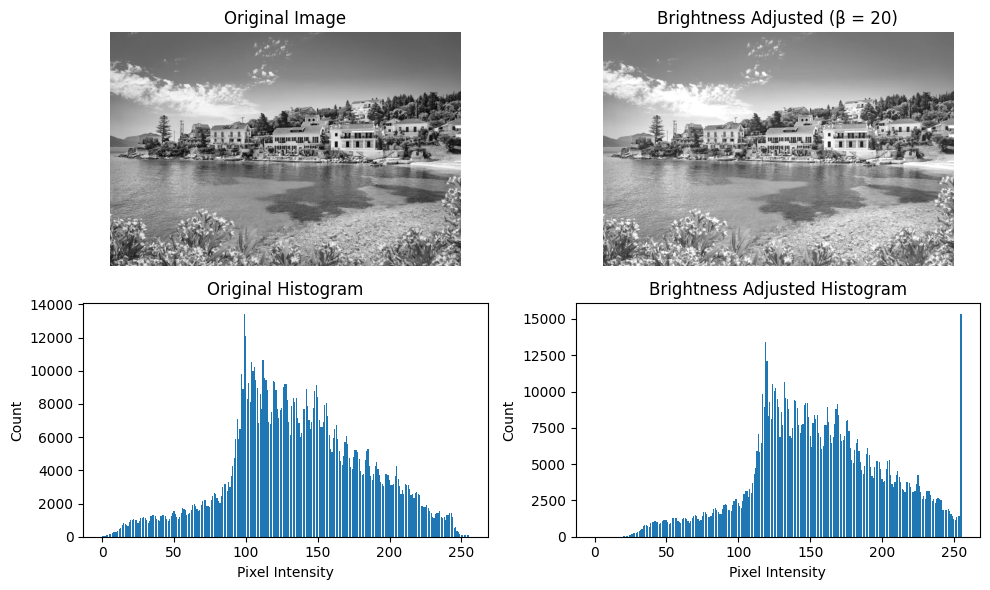

In [ ]:
import matplotlib.pyplot as plt
from skimage import data

# Adjust brightness (positive = brighter, negative = darker)
brightness_value = 20  # You can change this for experimentation
bright_img = adjust_brightness(natural_img, brightness_value)

# Prepare figure
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Original image
axes[0, 0].imshow(natural_img, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Brightness-adjusted image
axes[0, 1].imshow(bright_img, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title(f"Brightness Adjusted (β = {brightness_value})")
axes[0, 1].axis('off')

# Histogram for original
hist_orig = manual_histogram(natural_img)
axes[1, 0].bar(range(256), hist_orig)
axes[1, 0].set_title("Original Histogram")
axes[1, 0].set_xlabel("Pixel Intensity")
axes[1, 0].set_ylabel("Count")

# Histogram for brightness-adjusted
hist_bright = manual_histogram(bright_img)
axes[1, 1].bar(range(256), hist_bright)
axes[1, 1].set_title("Brightness Adjusted Histogram")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()


#### 3. Contrast  

Complete the `adjust_contrast()` function so that it receives a grayscale image and returns a new image with the **contrast adjusted** by scaling pixel intensities.

- Use a contrast factor **α**:  
  - α > 1.0 → increases contrast (bright areas become brighter, dark areas become darker)  
  - 0 < α < 1.0 → decreases contrast (image becomes flatter and grayer)  

- Remember to **clip** the values to the valid range \([0, 255]\).

The next code cell will display:  
- The original image and its histogram  
- The contrast-adjusted image and its histogram  

**Note:**  
Changing contrast **stretches** or **compresses** the histogram around its center.  
Clipping at 0 or 255 can create spikes at the ends.


In [ ]:
def adjust_contrast(img,alpha=1.0):
    """
    Contrast adjustment.
    new = clip(alpha * img, 0, 255)
    alpha > 1 increases contrast, 0 < alpha < 1 reduces contrast.
    """
    out = alpha * img.astype(np.float32)
    return np.clip(out, 0, 255).astype(np.uint8)

In [ ]:
import matplotlib.pyplot as plt
from skimage import data

# Adjust contrast (alpha > 1 = higher contrast, 0 < alpha < 1 = lower contrast)
contrast_factor = 0.5  # Change this for experimentation
contrast_img = adjust_contrast(natural_img, contrast_factor)

# Prepare figure
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Original image
axes[0, 0].imshow(natural_img, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Contrast-adjusted image
axes[0, 1].imshow(contrast_img, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title(f"Contrast Adjusted (α = {contrast_factor})")
axes[0, 1].axis('off')

# Histogram for original
hist_orig = manual_histogram(natural_img)
axes[1, 0].bar(range(256), hist_orig)
axes[1, 0].set_title("Original Histogram")
axes[1, 0].set_xlabel("Pixel Intensity")
axes[1, 0].set_ylabel("Count")

# Histogram for contrast-adjusted
hist_contrast = manual_histogram(contrast_img)
axes[1, 1].bar(range(256), hist_contrast)
axes[1, 1].set_title("Contrast Adjusted Histogram")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()


### Part E: Joint Histograms — Original vs. Transformed Images

A **joint histogram** $H_{X,Y}(i,j)$ counts how often intensity $i$ in image $X$ co-occurs with intensity $j$ at the same pixel location in image $Y$.

Here, you will compare the original image with three transformed versions:
1. **Brighter** (intensity shift)
2. **Higher contrast** (intensity scaling around the mean)

**What to expect:**
- **Brighter:** joint histogram along a diagonal but **shifted**.
- **Higher contrast:** diagonal with a **steeper spread** (more extreme values).

Note: Here we will use the built-in `np.histogram2d` function.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Example images: original, brightness-adjusted, and contrast-adjusted
img1 = data.camera().astype(np.uint8)
img_bright = adjust_brightness(img1, beta=40)
img_contrast = adjust_contrast(img1, alpha=0.8)

# --- Show original + adjusted images ---
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].imshow(img_bright, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Brightness Adjusted")
ax[1].axis('off')

ax[2].imshow(img_contrast, cmap='gray', vmin=0, vmax=255)
ax[2].set_title("Contrast Adjusted")
ax[2].axis('off')

plt.tight_layout()
plt.show()

# --- Compute joint histograms ---
H_bright, _, _ = np.histogram2d(
    img1.ravel(), img_bright.ravel(),
    bins=256, range=[[0, 256], [0, 256]]
)

H_contrast, _, _ = np.histogram2d(
    img1.ravel(), img_contrast.ravel(),
    bins=256, range=[[0, 256], [0, 256]]
)

# --- Plot both joint histograms side-by-side ---
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

im1 = ax[0].imshow(
    H_bright.T, origin='lower', cmap='magma',
    extent=[0, 255, 0, 255], aspect='auto'
)
ax[0].set_title("2D Joint Histogram (Brightness)")
ax[0].set_xlabel("Original Intensity")
ax[0].set_ylabel("Modified Intensity")
plt.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)

im2 = ax[1].imshow(
    H_contrast.T, origin='lower', cmap='magma',
    extent=[0, 255, 0, 255], aspect='auto'
)
ax[1].set_title("2D Joint Histogram (Contrast)")
ax[1].set_xlabel("Original Intensity")
ax[1].set_ylabel("Modified Intensity")
plt.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


## Part 2: Entropy

**Entropy** measures the amount of **information** (or **uncertainty**) in an image. In image processing, it quantifies how **unpredictable** pixel intensities are.

- A completely uniform image (all pixels the same) has **entropy = 0**.
- An image where intensities are spread and equally likely (e.g., strong noise) tends to have **higher entropy**.

---

### Mathematical definition (Shannon entropy)

For an image with $L$ possible intensity levels and probability $p(i)$ for each level $i$:
$$
H \;=\; -\sum_{i=0}^{L-1} p(i)\,\log_2 p(i)
$$

Where probabilities come from the normalized histogram:
$$
p(i) \;=\; \frac{\text{# of pixels with intensity } i}{\text{total # of pixels}}
$$

---

### Interpretation
- **Low entropy** → little variation; large flat/bright/dark areas dominate.  
- **High entropy** → lots of variation; rich textures or noise.

---

### Task
Implement `manual_entropy()` so that it:
1. Receives a **grayscale** image.
2. Computes the **normalized histogram** using your `manual_histogram()`.
3. Applies the entropy formula above.
4. Returns a single float: entropy in **bits**.

**Important notes**
- Ignore bins where $p(i)=0$ (to avoid $\log(0)$).
- Use `np.log2` for base‑2 logs.
- Expect entropy to **increase** as you add more noise (unless heavy clipping at 0/255 occurs).

**Experiment**  
After implementing, compare the entropy of the original image with Gaussian‑noisy versions (e.g., $\sigma=20$ vs. $\sigma=80$) and observe how $H$ changes and think why?




In [ ]:
def manual_entropy(img):
    """
    Compute the Shannon entropy (in bits) of a grayscale image using the
    manual_histogram() function.

    Parameters
    ----------
    img : np.ndarray
        Grayscale image with intensity values in [0, 255].

    Returns
    -------
    float
        Entropy in bits.
    """
    hist = manual_histogram(img)              # length-256 counts
    total = hist.sum()
    if total == 0:
        return 0.0

    p = hist.astype(np.float64) / total       # probabilities
    p = p[p > 0]                              # avoid log(0)
    H = -np.sum(p * np.log2(p))
    return float(H)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Reproducibility
rng = np.random.default_rng(0)

def add_gaussian_noise(img, sigma, rng):
    noise = rng.normal(0, sigma, img.shape)
    out = img.astype(np.float32) + noise
    return np.clip(out, 0, 255).astype(np.uint8)

# Create noisy versions
noisy_20 = add_gaussian_noise(natural_img, 20, rng)
noisy_80 = add_gaussian_noise(natural_img, 80, rng)

# Entropies
H_orig = manual_entropy(natural_img)
H_20   = manual_entropy(noisy_20)
H_80   = manual_entropy(noisy_80)

# Histograms
hist_orig = manual_histogram(natural_img)
hist_20   = manual_histogram(noisy_20)
hist_80   = manual_histogram(noisy_80)

# Plot: top row images (with entropy), bottom row histograms
fig, axes = plt.subplots(2, 3, figsize=(14, 7))

# Images
axes[0, 0].imshow(natural_img, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title(f"Original (H={H_orig:.3f} bits)")
axes[0, 0].axis('off')

axes[0, 1].imshow(noisy_20, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title(f"Noise σ=20 (H={H_20:.3f} bits)")
axes[0, 1].axis('off')

axes[0, 2].imshow(noisy_80, cmap='gray', vmin=0, vmax=255)
axes[0, 2].set_title(f"Noise σ=80 (H={H_80:.3f} bits)")
axes[0, 2].axis('off')

# Histograms
axes[1, 0].bar(range(256), hist_orig)
axes[1, 0].set_title("Original Histogram")
axes[1, 0].set_xlabel("Pixel Intensity"); axes[1, 0].set_ylabel("Count")

axes[1, 1].bar(range(256), hist_20)
axes[1, 1].set_title("Histogram (σ=80)")
axes[1, 1].set_xlabel("Pixel Intensity"); axes[1, 1].set_ylabel("Count")

axes[1, 2].bar(range(256), hist_80)
axes[1, 2].set_title("Histogram (σ=80)")
axes[1, 2].set_xlabel("Pixel Intensity"); axes[1, 2].set_ylabel("Count")

plt.tight_layout()
plt.show()


## Part 3: Mutual Information

### Part a
**Mutual Information (MI)** measures how much **information** is shared between two images.  
It tells us how much knowing the pixel intensity in one image reduces uncertainty about the corresponding pixel in the other image.

- If two images are **identical**, their MI is **maximal** (equal to their entropy).
- If two images are **completely unrelated** (e.g., one is random noise with no correlation to the other), their MI is close to **0**.

---

### Mathematical Definition

Given two images $X$ and $Y$ with **joint probability** $p(x,y)$ and **marginal probabilities** $p(x)$ and $p(y)$:

$$
MI(X, Y) = \sum_{x=0}^{L-1} \sum_{y=0}^{L-1} p(x,y) \; \log_2 \left( \frac{p(x,y)}{p(x) \, p(y)} \right)
$$

Where:
- $p(x,y)$ comes from the **joint histogram** of the two images, normalized so that it sums to 1.
- $p(x)$ and $p(y)$ are obtained by summing over the rows/columns of the joint histogram.

---

### Interpretation
- **High MI** → Images are strongly related (high similarity in structure).
- **Low MI** → Images are largely independent (low similarity).

---

### Task
Implement `manual_mutual_information(img1, img2)` so that it:
1. Computes the **joint histogram** of the two images.
2. Converts it into a joint probability distribution $p(x,y)$.
3. Calculates $p(x)$ and $p(y)$ from the joint distribution.
4. Applies the MI formula above.
5. Returns the MI value in **bits**.

**Important notes:**
- Only sum over bins where $p(x,y) > 0$ to avoid $\log(0)$ issues.
- Use `np.log2` for base-2 logs.
- Both images must be the same size and **grayscale**.

---

### Experiment
In the code below, MI is computed between the original image and several modified versions:
1. **Shifted** (cyclic horizontal shift)
2. **Brightness adjusted** (+40 intensity)
3. **Contrast adjusted** (scaled by 0.6)
4. **Gaussian noise** ($\sigma = 20$)

Observe how MI changes for each modification and think why?

You are encouraged to experiment with the modification levels.


In [ ]:
def manual_mutual_information(img1, img2, bins=256):
    """
    Compute the mutual information (in bits) between two grayscale images.

    Parameters
    ----------
    img1, img2 : np.ndarray
        Grayscale images (same shape), uint8 preferred. Values should be in [0, 255].
    bins : int
        Number of intensity bins (default 256 for 8-bit images).

    Returns
    -------
    float
        Mutual information in bits.
    """
    if img1.shape != img2.shape:
        raise ValueError("manual_mutual_information: images must have the same shape")

    # Compute joint histogram (counts)
    H, xedges, yedges = np.histogram2d(
        img1.ravel(), img2.ravel(),
        bins=bins, range=[[0, 256], [0, 256]]
    )

    # Convert to joint probability
    total = H.sum()
    if total == 0:
        return 0.0
    Pxy = H / total

    # Marginals
    Px = Pxy.sum(axis=1, keepdims=True)  # shape (bins, 1)
    Py = Pxy.sum(axis=0, keepdims=True)  # shape (1, bins)

    # Only consider positive joint probs to avoid log(0)
    nz = Pxy > 0
    # Expected: MI = sum p(x,y) * log2( p(x,y) / (p(x)p(y)) )
    MI = np.sum(Pxy[nz] * (np.log2(Pxy[nz]) - np.log2((Px @ Py)[nz])))

    return float(MI)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

rng = np.random.default_rng(0)

def shift_image(img, shift_x=0, shift_y=0):
    return np.roll(np.roll(img, shift_y, axis=0), shift_x, axis=1)

def add_gaussian_noise(img, sigma, rng):
    noise = rng.normal(0, sigma, img.shape)
    out = img.astype(np.float32) + noise
    return np.clip(out, 0, 255).astype(np.uint8)

# --- Load base image ---
img = data.camera().astype(np.uint8)

# --- Variants ---
shifted_img  = shift_image(img, shift_x=30, shift_y=0)         # cyclic shift from your function
bright_img   = adjust_brightness(img, beta=40)                  # brighter
contrast_img = adjust_contrast(img, alpha=0.6)                  # higher contrast
noisy_img = add_gaussian_noise(img, 20, rng)

# --- MI values w.r.t. original ---
mi_shift   = manual_mutual_information(img, shifted_img)
mi_bright  = manual_mutual_information(img, bright_img)
mi_contrast= manual_mutual_information(img, contrast_img)
mi_noise   = manual_mutual_information(img, noisy_img)

# --- Plot ---
images = [
    ("Original", img, None),
    (f"Shifted (MI={mi_shift:.3f} bits)", shifted_img, None),
    (f"Bright +40 (MI={mi_bright:.3f} bits)", bright_img, None),
    (f"Contrast ×1.3 (MI={mi_contrast:.3f} bits)", contrast_img, None),
    (f"Noise σ=20 (MI={mi_noise:.3f} bits)", noisy_img, None),
]

# Arrange as a 2x3 grid (last slot empty for spacing)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for ax in axes.ravel():
    ax.axis('off')

for ax, (title, im, _) in zip(axes.ravel(), images):
    ax.imshow(im, cmap='gray', vmin=0, vmax=255)
    ax.set_title(title)

plt.tight_layout()
plt.show()

### Part b: Mutual Information Between Neighboring Pixels

In natural images, **neighboring pixels** tend to have similar intensities because most real-world scenes contain smooth regions and continuous edges.  
This creates **strong statistical dependency** between a pixel and its spatial neighbors, which can be measured using **Mutual Information (MI)**.

---

### How we measure it here:
- For each pixel at position $(r, c)$, we take its **left neighbor** at $(r, c-1)$.
- We treat these two as paired variables $X$ and $Y$.
- We compute the **mutual information**:

$$
MI(X, Y) = \sum_{x}\sum_{y} p(x, y) \log_2 \frac{p(x, y)}{p(x) p(y)}
$$

where:
- $p(x, y)$ is the **joint probability** of pixel value $x$ and its left neighbor having value $y$.
- $p(x)$ and $p(y)$ are the marginal probabilities (individual histograms).

---

### Why this is interesting:
- **Natural image:** Neighboring pixels are highly correlated → **high MI**.
- **Block-permuted image:** We randomly shuffle large blocks of pixels.  
  - The histogram is preserved (pixel values occur with the same frequency).  
  - But spatial relationships are destroyed → **low MI**.

---

**Key point:**  
Mutual information between neighbors captures **spatial structure**,  
while the histogram alone only captures **global intensity distribution**.  
This means two images can have **identical histograms** but very different MI values if their spatial arrangements differ.

---
The following code compares the **mutual information between neighboring pixels** in:

1. **Original natural image**  
   - Neighboring pixels tend to have similar values due to smooth regions and continuous edges.
   - This results in **high mutual information** with left neighbors.

2. **Block-permuted image**  
   - The image is divided into large non-overlapping blocks that are randomly shuffled.
   - This preserves the **global histogram** (pixel intensities occur with the same frequency) but **destroys spatial structure**.
   - As a result, neighboring pixels are much less correlated, and **mutual information drops**.

Experiment with block size of different modifications and see how it affects the MI.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from functions import block_permutation

# --- Load grayscale image ---
img = data.camera().astype(np.uint8)

# --- Build "left-neighbor" pairs WITHOUT wrap-around (crop) ---
# X = pixel at (r, c), Y = left neighbor at (r, c-1)
X = img[:, 1:]
Y = img[:, :-1]
mi_left_orig = manual_mutual_information(X, Y)

# --- Block-permuted image (same histogram, broken spatial structure) ---
img_perm = block_permutation(img, rng, n_blocks=4)
Xp = img_perm[:, 1:]
Yp = img_perm[:, :-1]
mi_left_perm = manual_mutual_information(Xp, Yp)

# --- Histograms (should be nearly identical) ---
hist_orig = manual_histogram(img)
hist_perm = manual_histogram(img_perm)

print(f"MI with left neighbor — Original: {mi_left_orig:.4f} bits")
print(f"MI with left neighbor — Block-permuted: {mi_left_perm:.4f} bits")

# --- Plots ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original image
axes[0, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title(f"Original (MI_left = {mi_left_orig:.3f} bits)")
axes[0, 0].axis('off')

# Block-permuted image
axes[0, 1].imshow(img_perm, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title(f"Block-permuted (MI_left = {mi_left_perm:.3f} bits)")
axes[0, 1].axis('off')

# Histograms
axes[1, 0].bar(range(256), hist_orig)
axes[1, 0].set_title("Original Histogram")
axes[1, 0].set_xlabel("Intensity"); axes[1, 0].set_ylabel("Count")

axes[1, 1].bar(range(256), hist_perm)
axes[1, 1].set_title("Block-permuted Histogram")
axes[1, 1].set_xlabel("Intensity"); axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()


## Submission Task

The `random_modification` function in `functions.py` chosses an image from a given dataset and applies modification to it. It returns the *original image*, the *modified image* and the *modification type*.


Your task is to use the tools you have learned so far to **identify**
 **The type of modification** applied to it.



You must complete the function **`identify_image`**, which:
- Receives the **orginal image** (`orig_img`)
and the **modified image** (`mod_img`) from the `random_modification` and
- Returns the modification type as a **string**.


---

### Possible modification types:
- `brightness`
- `contrast`
- `noise`
- `block_permutation`
- `invert`
- `flip_h`
- `flip_v`
- `half_flip`

---

### Important:

Read carefully — not following these rules will result in a grade of **0**.


- Your function must **use the tools you have learned to find the answer**.
  - **Do not** try to modify the original image to match the modified one and then compare them.
  - Using a built-in tool that solves the task automatically (e.g. detection libraries or shortcuts) will result in a grade of **0**, even if your code works.
  - This will be tested!

- Your code will be tested **automatically** on many examples, including **hidden test cases** with different images and modifications.

- Make sure your result is exactly as expected:
  - For example, return `"flip_h"` (all lowercase), **not** `"Flip_H"` or `"FLIP_H"`.

- **Do not plot or display images** inside your function.
  - No `plt.imshow`, `cv2.imshow`, etc.

- Your code must **run without errors**.
  - If it crashes or throws an exception, the grade is **0**.

- Your code must be **your own work**.
  - Keep it clear, concise and simple- It will be reviewed.
  - No copying from other students or AI tools.
  - This will be tested!




GOOD LUCK!

### Example of `random_modification`
Feel free to experiment

In [ ]:
from functions import random_modification
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Example dataset
dataset = [data.astronaut(), data.chelsea(), data.coffee(), data.camera()]

# Random number generator
rng = np.random.default_rng(4)

# --- Example 1: random modification ---
orig, mod, mtype = random_modification(dataset=dataset, rng=rng)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(orig, cmap="gray")
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].imshow(mod, cmap="gray")
ax[1].set_title(f"Modified ({mtype})")
ax[1].axis("off")

plt.show()




Example for testing

In [ ]:
from functions import return_names_IDs,random_modification, identify_image
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Example dataset
dataset = [data.astronaut(), data.chelsea(), data.coffee(), data.camera()]
score = 0
num_tests = 0
# Random number generator
rng = np.random.default_rng(4)

name1,id1,name2,id2 = return_names_IDs()
print(f"name1: {name1}, id1: {id1} name2: {name2}, id2: {id2}")


orig, mod, mtype = random_modification(dataset=dataset, rng=rng)
num_tests+=1

student_mtype = identify_image(orig, mod)
if student_mtype == mtype:
  score+=1
print(f"score is: {score/num_tests*100}%. function returned: {student_mtype}, modification_type is: {mtype}")